# Data Exploration for Walmart Sales Forecasting

This notebook explores Walmart sales data to understand its structure, identify key features, and gain initial insights that will guide the rest of the project.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the datasets
features_df = pd.read_csv('../Data/features.csv')
stores_df = pd.read_csv('../Data/stores.csv')
train_df = pd.read_csv('../Data/train.csv')
test_df = pd.read_csv('../Data/test.csv')

# First few rows of each dataset
print("Features DataFrame:")
print(features_df.head())

print("\nStores DataFrame:")
print(stores_df.head())

print("\nTrain DataFrame:")
print(train_df.head())

print("\nTest DataFrame:")
print(test_df.head())


Features DataFrame:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  

Stores DataFrame:
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3 

In [3]:
# Checking data types
print("Features Data Types and Info:")
print(features_df.info())

print("\nStores Data Types and Info:")
print(stores_df.info())

print("\nTrain Data Types and Info:")
print(train_df.info())

print("\nTest Data Types and Info:")
print(test_df.info())

# Summary statistics
print("\nSummary Statistics for Features DataFrame:")
print(features_df.describe())

print("\nSummary Statistics for Train DataFrame:")
print(train_df.describe())

# Count the number of True and False values in the IsHoliday column
holiday_counts = train_df['IsHoliday'].value_counts()

# Display the counts
print(holiday_counts)



Features Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None

Stores Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  ---

Weekly Sales = Weekly Sales for a given department in a given store

In [4]:
# Checking missing values
print("\nMissing Values in Features Dataset:")
display(features_df.isnull().sum())

print("\nMissing Values in Stores Dataset:")
display(stores_df.isnull().sum())

print("\nMissing Values in Train Dataset:")
display(train_df.isnull().sum())

# Checking percentage of missing values in markdown columns in the features dataset
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
missing_markdown = features_df[markdown_cols].isnull().mean() * 100
print("\nPercentage of Missing Values in MarkDown Columns:")
display(missing_markdown)



Missing Values in Features Dataset:


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


Missing Values in Stores Dataset:


Store    0
Type     0
Size     0
dtype: int64


Missing Values in Train Dataset:


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


Percentage of Missing Values in MarkDown Columns:


MarkDown1    50.769231
MarkDown2    64.334554
MarkDown3    55.885226
MarkDown4    57.704518
MarkDown5    50.549451
dtype: float64

## Taking a look into what analysis needs to be done

In [68]:
# Merging train, features, and stores datasets
merged_data = pd.merge(train_df, features_df, on=['Store', 'Date'], how='left')
merged_data = pd.merge(merged_data, stores_df, on='Store', how='left')
merged_data.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [69]:
# One-hot encode the 'Type' column
merged_data = pd.get_dummies(merged_data, columns=['Type'], drop_first=True)

# Check the new columns created
merged_data.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Size,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,151315,False,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,151315,False,False
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,151315,False,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,151315,False,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,151315,False,False


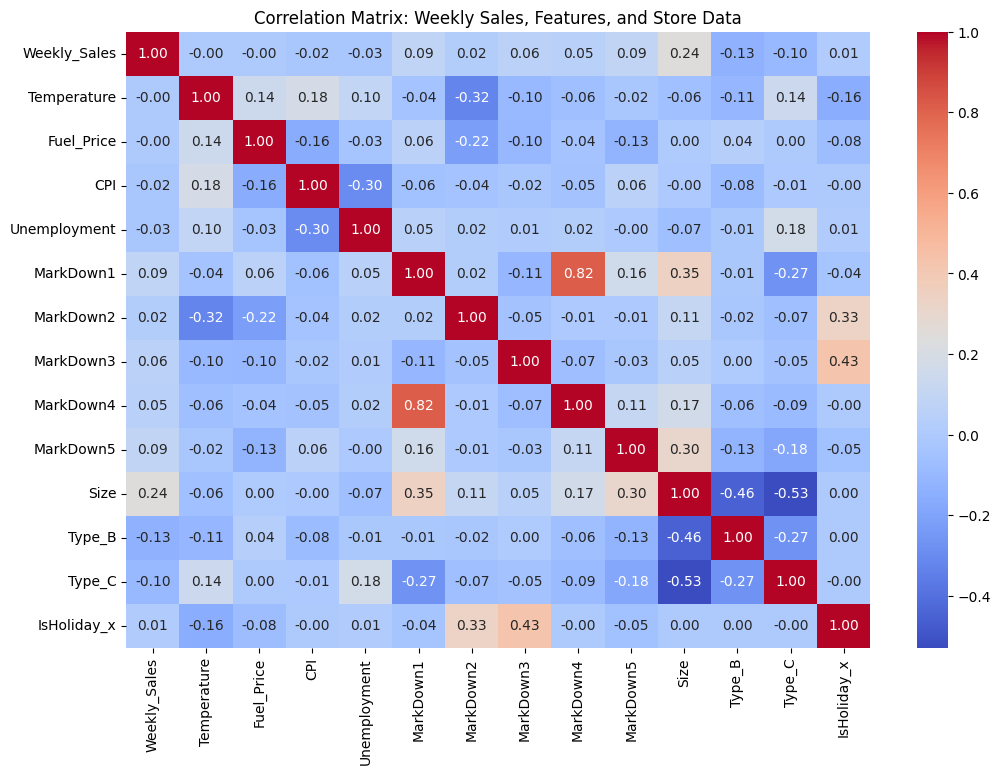

In [70]:
# Check if IsHoliday_X and IsHoliday_Y are identical


# correlation matrix 
corr_matrix = merged_data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
                           'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
                           'Size', 'Type_B', 'Type_C','IsHoliday_x']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Weekly Sales, Features, and Store Data')
plt.show()



### Immediate take aways

1. Store size has strongest correlation with weekly sales- makes logical sense. Could look later to see if certain markdowns are more effective for larger stores. 

2. Holidays have weak impact on weekly sales- likely because its so dilluted considering that there are few holidays. 

3. Need to better understand what MarkDowns are

Need to look into:

1. Department level trends

2. CPI and Unemployment

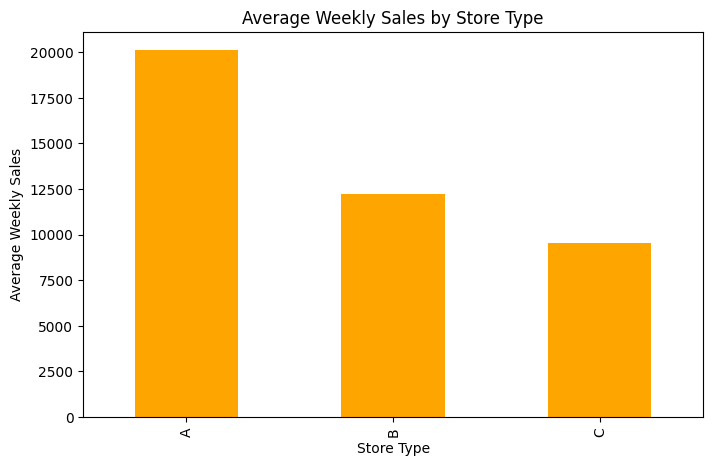

Type
A    [151315, 202307, 205863, 202505, 155078, 20749...
B    [37392, 34875, 70713, 125833, 126512, 112238, ...
C                         [42988, 39910, 39690, 41062]
Name: Size, dtype: object

In [73]:
# Merging the train and stores datasets again to evaluate store Types
train_merged_df = train_df.merge(stores_df, on='Store')

# Aggregating sales by store type
sales_by_store_type = train_merged_df.groupby('Type')['Weekly_Sales'].mean()

# Plotting sales by store type
plt.figure(figsize=(8, 5))
sales_by_store_type.plot(kind='bar', color='orange')
plt.title('Average Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')
plt.show()

# Grouping by store type and checking the unique sizes for each store type
store_sizes_by_type = stores_df.groupby('Type')['Size'].unique()

# Displaying the unique sizes for each store type
store_sizes_by_type


Store Type A: ~150k-207k sq feet

Store Type B: ~34k-126k sq feet

Store Type C: ~39k-43k sq feet

Confirming larger store likely yields larger sales.

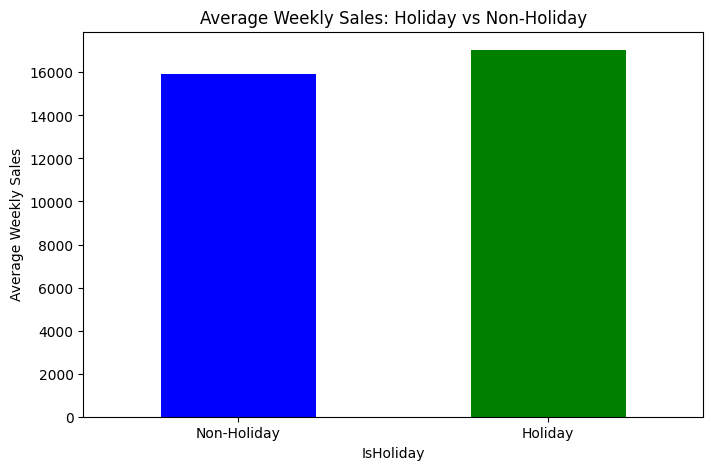

In [74]:
# Aggregating sales by holiday or non-holiday
holiday_sales = train_df.groupby('IsHoliday')['Weekly_Sales'].mean()

# Plotting sales during holidays vs. non-holidays
plt.figure(figsize=(8, 5))
holiday_sales.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('IsHoliday')
plt.ylabel('Average Weekly Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

Confirming there isn't a huge difference between sales during non-holiday and holiday periods, but there is a difference- noted for later. 

## Exploring the MarkDown Features


MarkDowns represent different types of discounts Walmart applies to products. 

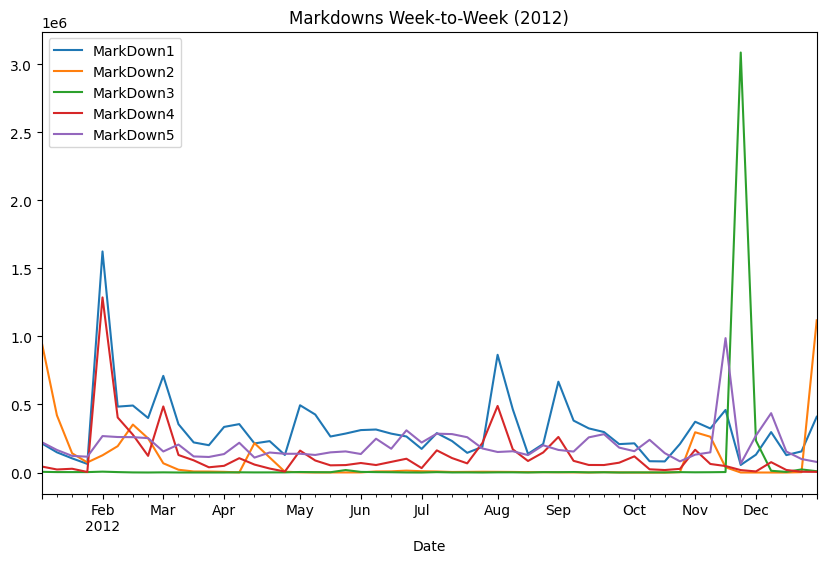

In [19]:
# Resample data by week to get weekly sums or averages
weekly_data = filtered_data.set_index('Date').resample('W').sum()

# Plot markdowns week-to-week
weekly_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(figsize=(10,6))
plt.title('Markdowns Week-to-Week (2012)')
plt.show()


MarkDown1: relatively consistent throughout the year with noticeable spikes in February, March, May, August, and September: might represent general store-wide promotions that occur regularly throughout the year

MarkDown2: Isolared spikes in January, late February, mid April, and early November: seems to be used sporadically for specific, high-impact events such as clearance of inventory, seasonal promotions, or pre-holiday preparations. Does not seem to be part of regular store-wide promotions.  

MarkDown3: Dormant for all periods except late November- likely Black Friday promos

MarkDown4: Extremely similar to MarkDown1, might represent more targetted/ supplemental discounts. 

MarkDown5: Very consistent, least spikes, only around Black Friday/ Christmas sales. Could represent clearance events (end-of-season sales)

## Exploring Temperature


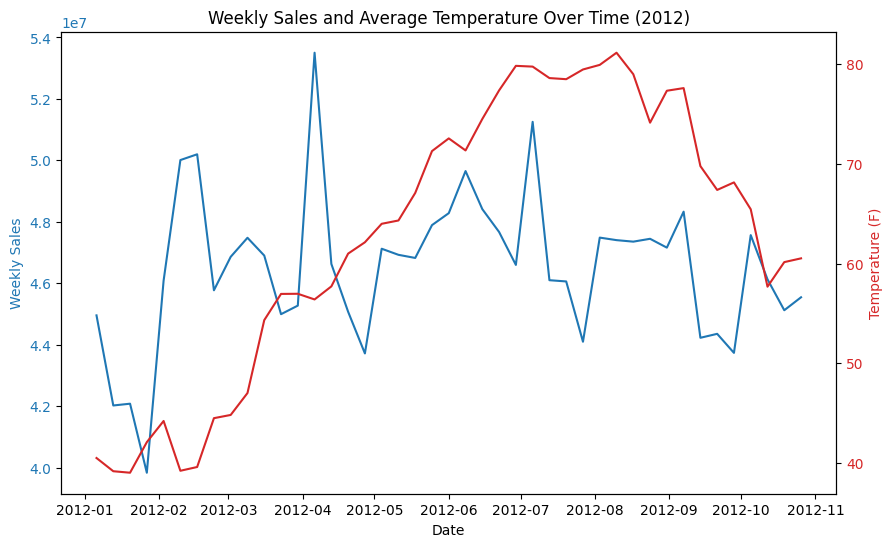

In [30]:
# Merging train data with features on Store and Date
merged_data = pd.merge(train_df, features_df, on=['Store', 'Date'], how='left')

filtered_2012_data = merged_data[(merged_data['Date'] >= '2012-01-01') & (merged_data['Date'] <= '2012-12-31')]

# Grouping by Date to aggregate Weekly Sales and Temperature for 2012
grouped_data_2012 = filtered_2012_data.groupby('Date').agg({'Weekly_Sales': 'sum', 'Temperature': 'mean'}).reset_index()

# Plotting Weekly Sales and Temperature over time for 2012 on dual axes
fig, ax1 = plt.subplots(figsize=(10,6))

# Plotting Weekly Sales on the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='tab:blue')
ax1.plot(grouped_data_2012['Date'], grouped_data_2012['Weekly_Sales'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis for temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (F)', color='tab:red')
ax2.plot(grouped_data_2012['Date'], grouped_data_2012['Temperature'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Weekly Sales and Average Temperature Over Time (2012)')
plt.show()



No clear linear relantion ship between sales and temperature

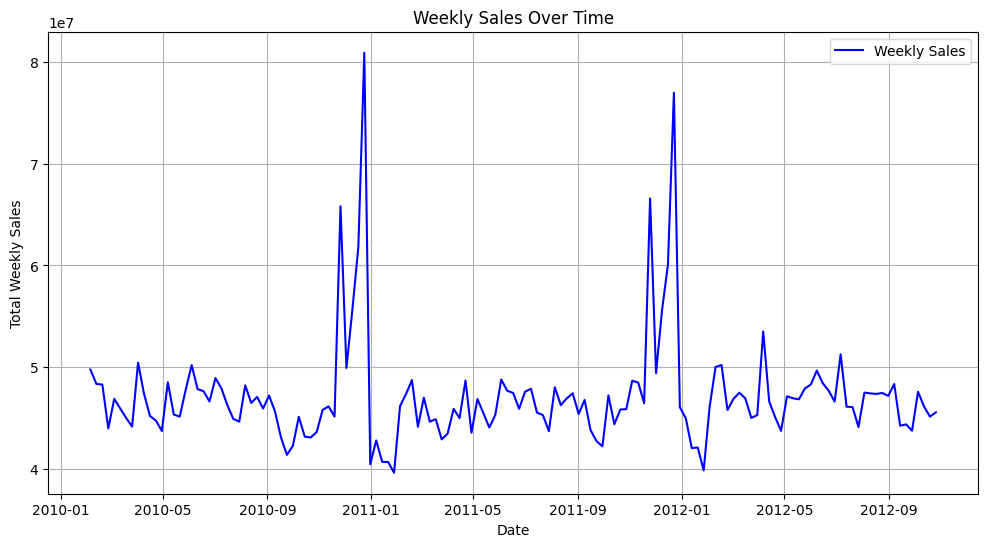

In [11]:
# Converting 'Date' columns to datetime
features_df['Date'] = pd.to_datetime(features_df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Aggregating weekly sales over time
sales_over_time = train_df.groupby('Date')['Weekly_Sales'].sum()

# Plotting sales over time
plt.figure(figsize=(12,6))
plt.plot(sales_over_time, label="Weekly Sales", color="blue")
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.legend()
